# 3-1 低阶API示范
低阶API主要包括张量操作, 计算图和自动微分

In [36]:
import tensorflow as tf
import time
from matplotlib import pyplot as plt

In [5]:
# 使用低阶API实现一元线性回归, 并可视化  y = 2x + 3
n = 400
x = tf.random.uniform([n, 1], minval = -10, maxval = 10)
w0 = tf.constant([[2.0]])
b0 = tf.constant([[3.0]])
y = x @ w0 + b0 + tf.random.normal([n, 1], mean = 0.0, stddev = 2.0)  # 加上正态扰动

In [33]:
# 使用动态图调试
w = tf.Variable(tf.random.normal(w0.shape))
b = tf.Variable(tf.random.normal(b0.shape))
def train(iteration_num, learning_rate = 0.01, print_loss = True):
    global x, w, b
    for i in range(iteration_num):
        # batch-gradient descent
        with tf.GradientTape() as tape:
            y_pred = x @ w + b
            loss = tf.reduce_mean((y_pred - y)**2) / 2
        dloss_dw, dloss_db = tape.gradient(loss, [w, b])
        w.assign_sub(learning_rate * dloss_dw)
        b.assign_sub(learning_rate * dloss_db)
        if print_loss and i % 100 == 0:
            y_pred = x @ w + b
            tf.print("loss: ", tf.reduce_mean((y_pred - y)**2) / 2)
# 训练500次
time_start = time.time()
train(500)
time_end = time.time()
tf.print("w: ", w, "b: ", b)
print("time_cost:", time_end - time_start, "s")

loss:  9.71157455
loss:  2.28068948
loss:  1.6779027
loss:  1.5969255
loss:  1.5860467
w:  [[1.98806536]] b:  [[3.05336475]]
time_cost: 0.9399843215942383 s


In [34]:
# 使用AutoGraph, 加速训练
w = tf.Variable(tf.random.normal(w0.shape))
b = tf.Variable(tf.random.normal(b0.shape))

@tf.function
def train_autograph(iteration_num, learning_rate = 0.01, print_loss = True):
    global x, w, b
    for i in tf.range(iteration_num):   # 注意这里用tf.range
        # batch-gradient descent
        with tf.GradientTape() as tape:
            y_pred = x @ w + b
            loss = tf.reduce_mean((y_pred - y)**2) / 2
        dloss_dw, dloss_db = tape.gradient(loss, [w, b])
        w.assign_sub(learning_rate * dloss_dw)
        b.assign_sub(learning_rate * dloss_db)
        if print_loss and i % 100 == 0:
            y_pred = x @ w + b
            tf.print("loss: ", tf.reduce_mean((y_pred - y)**2) / 2)
# 训练500次
time_start = time.time()
train_autograph(500)
time_end = time.time()
tf.print("w: ", w, "b: ", b)
print("time_cost:", time_end - time_start, "s")

loss:  49.5823479
loss:  2.80295
loss:  1.74806166
loss:  1.60635066
loss:  1.58731318
w:  [[1.98802197]] b:  [[3.04641581]]
time_cost: 0.3876030445098877 s


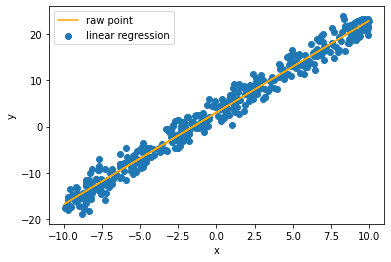

In [42]:
# 绘制最后拟合的图像
%matplotlib inline
plt.scatter(x, y)
plt.plot(x, x @ w + b, color='orange')
plt.legend(["raw point", "linear regression"])
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [41]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f